## CT image enhancement - conventional methods
- Normalization, Histogram Equalization, Filtering, Dictionary Learning
- This is an ipynb file created in Kaggle environment

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 0. Load datasets

In [2]:
IS_LOCAL = True
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import cv2

if(IS_LOCAL):
    import pydicom as dicom
else:
    import dicom
    
import os

In [3]:
if(IS_LOCAL):
    PATH="../input/siim-medical-images/"
else:
    PATH="../input/"
print(os.listdir(PATH))

['dicom_dir', 'full_archive.npz', 'tiff_images', 'overview.csv']


In [4]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))

In [5]:
with np.load('../input/siim-medical-images/full_archive.npz', allow_pickle = True) as im_data:
    full_image_dict = dict(zip(im_data['idx'], im_data['image']))

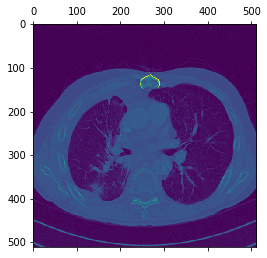

In [6]:
plt.matshow(full_image_dict[0])

In [7]:
print("Shape of the image :", full_image_dict[0].shape)

orig_img1 = full_image_dict[0]
orig_img2 = full_image_dict[1]

Shape of the image : (512, 512)


## 1. Normalization

In [8]:
def histo(img):
    flat = img.flatten()
    plt.hist(flat, bins = 50)

(-0.5, 511.5, 511.5, -0.5)

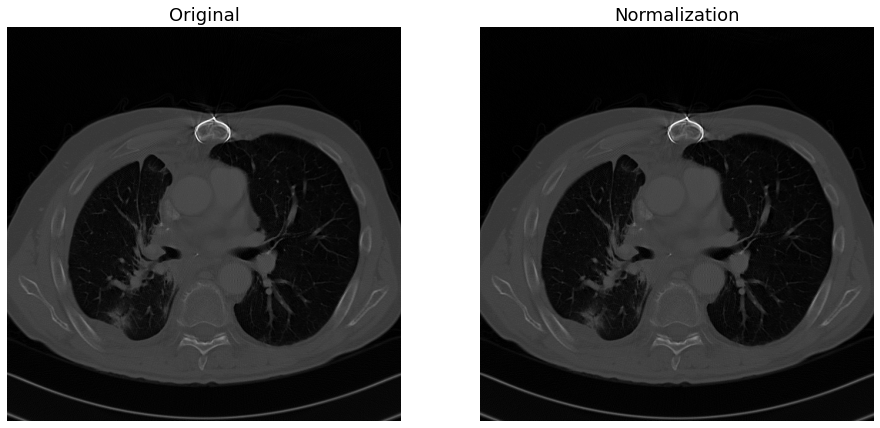

In [12]:
# Manual
img1_norm = ((orig_img1 - orig_img1.min()) * (255) / (orig_img1.max() - orig_img1.min()))
img1_norm = img_norm.astype(np.uint8)
img2_norm = ((orig_img2 - orig_img2.min()) * (255) / (orig_img1.max() - orig_img1.min()))
img2_norm = img_norm.astype(np.uint8)

# Visualization
plt.rcParams["figure.figsize"] = (24,8)
plt.figure()

plt.subplot(1,3,1)
plt.imshow(orig_img1, cmap='gray')
plt.title("Original", fontsize = 18)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img1_norm, cmap='gray')
plt.title("Normalization", fontsize = 18)
plt.axis("off")

In [13]:
print("MAX of img :", img_norm.max())
print("MIN of img :", img_norm.min())

MAX of img : 255
MIN of img : 0


## 2. Histogram Equalization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


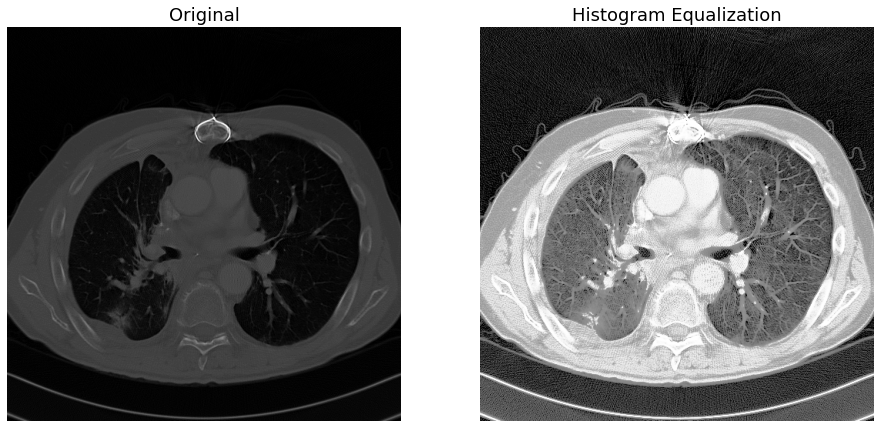

In [14]:
rows, cols = orig_img2.shape[:2]

# Manual Histogram Equalization
imhist,bins = np.histogram(img2_norm.flatten(),256,normed=True)
cdf = imhist.cumsum() # cumulative distribution function
cdf = 255 * cdf / cdf[-1] # normalize

# use linear interpolation of cdf to find new pixel values
im2 = np.interp(img2_norm.flatten(),bins[:-1],cdf)
img2 = im2.reshape(img2_norm.shape)

# Visualization
plt.rcParams["figure.figsize"] = (24,8)
plt.figure()

plt.subplot(1,3,1)
plt.imshow(img2_norm, cmap='gray')
plt.title("Original", fontsize = 18)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.title("Histogram Equalization", fontsize = 18)
plt.axis("off")
plt.show()

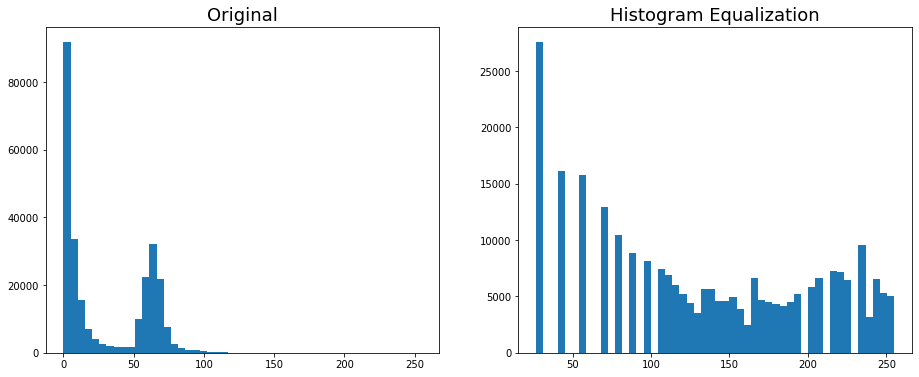

In [15]:
# Histogram Visualization
plt.rcParams["figure.figsize"] = (24,6)
plt.figure()

plt.subplot(1,3,1)
histo(img2_norm)
plt.title("Original", fontsize = 18)

plt.subplot(1,3,2)
histo(img2)
plt.title("Histogram Equalization", fontsize = 18)
plt.show()

## 3. Filtering
- Gaussian, Sobel

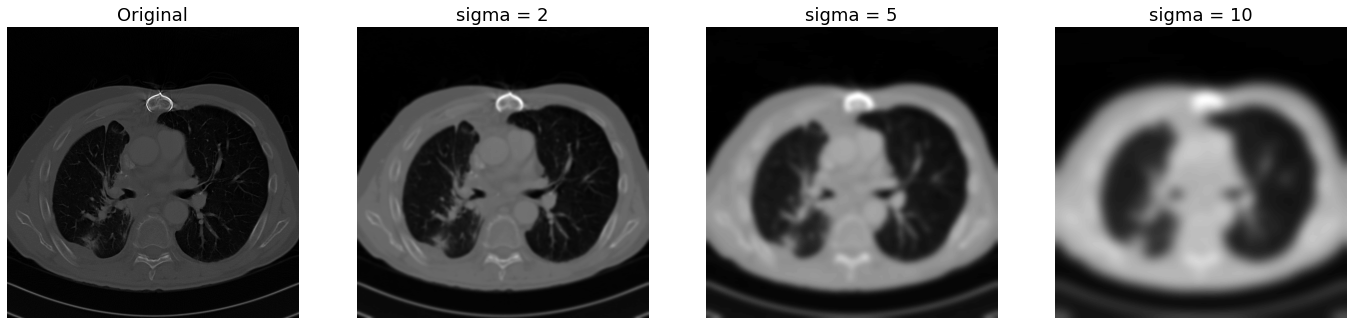

In [16]:
# Gaussian Filtering
from scipy.ndimage import filters

img2_2 = filters.gaussian_filter(img2_norm,2)
img2_5 = filters.gaussian_filter(img2_norm,5)
img2_10 = filters.gaussian_filter(img2_norm,10)

# Visualization
plt.rcParams["figure.figsize"] = (24,6)
plt.figure()

plt.subplot(1,4,1)
plt.imshow(img2_norm, cmap='gray')
plt.title("Original", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(img2_2, cmap='gray')
plt.title("sigma = 2", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(img2_5, cmap='gray')
plt.title("sigma = 5", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(img2_10, cmap='gray')
plt.title("sigma = 10", fontsize = 18)
plt.axis("off")
plt.show()

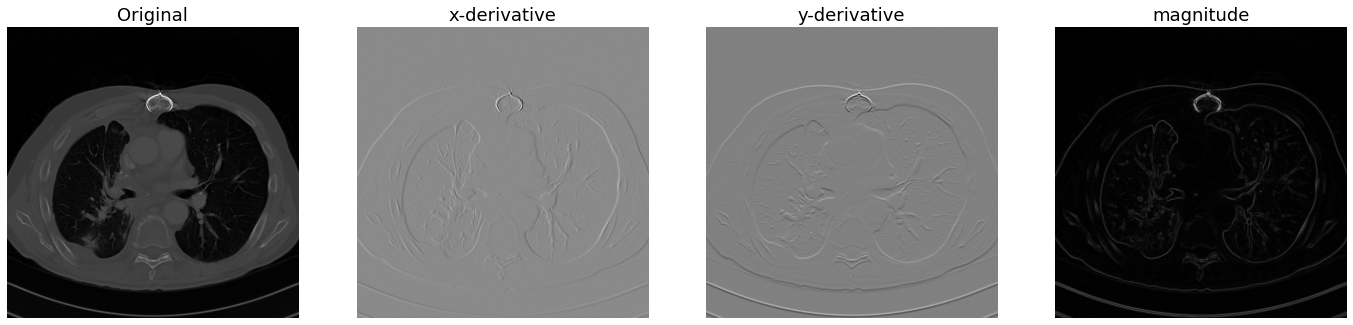

In [20]:
from scipy.ndimage import filters

# Sobel derivative filters
imx = np.zeros(img1_norm.shape)
deri_x = filters.sobel(img1_norm,1,imx)

imy = np.zeros(img1_norm.shape)
deri_y = filters.sobel(img1_norm,0,imy)

magnitude = np.sqrt(imx**2+imy**2)

# Visualization
plt.rcParams["figure.figsize"] = (24,6)
plt.figure()

plt.subplot(1,4,1)
plt.imshow(img1_norm, cmap='gray')
plt.title("Original", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(deri_x, cmap='gray')
plt.title("x-derivative", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(deri_y, cmap='gray')
plt.title("y-derivative", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(magnitude, cmap='gray')
plt.title("magnitude", fontsize = 18)
plt.axis("off")
plt.show()

## 4. Dictionary Learning
- in progress

In [25]:
from sklearn.datasets import make_sparse_coded_signal
from sklearn.decomposition import DictionaryLearning

In [26]:
dict_learner = DictionaryLearning(n_components=5, transform_algorithm='lasso_lars', random_state=42)
X_transformed = dict_learner.fit_transform(img2_norm)

In [29]:
X_transformed.shape

(512, 5)

(-0.5, 4.5, 48.5, -0.5)

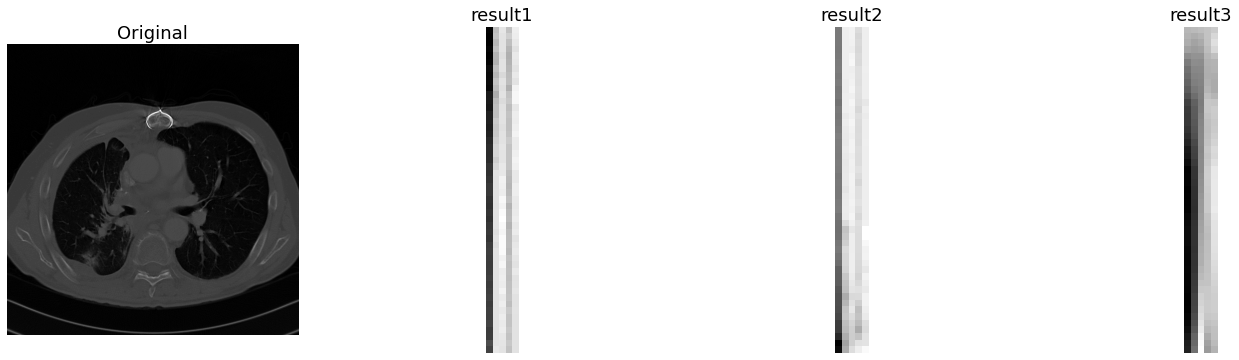

In [39]:
# Visualization (in progress...)
plt.rcParams["figure.figsize"] = (24,6)
plt.figure()

plt.subplot(1,4,1)
plt.imshow(img2_norm, cmap='gray')
plt.title("Original", fontsize = 18)
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(X_transformed[:50,:], cmap='gray')
plt.title("result1", fontsize = 18)
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(X_transformed[51:100,:], cmap='gray')
plt.title("result2", fontsize = 18)
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(X_transformed[101:150,:], cmap='gray')
plt.title("result3", fontsize = 18)
plt.axis("off")